# Read raiting rating csv, joined products table and drop un-used column 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

raiting = pd.read_csv('./ratings_drop.csv' , usecols=[ 'userId' , 'productId' , 'rating'] )
products = pd.read_csv('./products_join_categories.csv')
products = products.loc[:, ~products.columns.str.contains('^Unnamed')]
products.set_index( ['productId'] , inplace=True, drop=True )
products = products.rename({'name': 'product_name'}, axis='columns')
display(products.head())

In [2]:
raiting.sample(10)
display(products.sample(10))

,product_name,catIds,cat1,cat1_name,cat2,cat2_name,cat3,cat3_name
productId,,,,,,,,
525336,ochirly 欧时力 女式 毛领中长款羽绒服大衣外套 113433028018,"802,681,1082",802,服饰服装,681,女装,1082.0,羽绒服
524549,全国美术考级专用教材:书法考级(9-10级),"832,1101,1116",832,图书音像,1101,少儿/教育图书,1116.0,考试
57651,蒂乐 100%竹纤维 婴儿毛毯 超大尺寸空调毯子 蓝 DL505B,"911,549,1056",911,母婴/玩具,549,童车/床/儿童轮滑,1056.0,儿童床上用品
1827,新理念包装设计,"832,519,1076",832,图书音像,519,文学艺术,1076.0,艺术
215240,C.banner 千百度 女士单鞋/高跟鞋 A3231601A,"518,391,51",518,鞋类箱包,391,女鞋,51.0,单鞋
451056,日本美人画赏析,"832,552,892",832,图书音像,552,音像,892.0,有声读物
389376,Harman/Kardon 哈曼卡顿 SOUNDSTICKSBTCN 无线水晶 音箱,"1128,823,1045",1128,手机/数码,823,数码配件,1045.0,MacBook配件
314898,人物画形象参考丛书:工笔人物篇2,"832,519,1076",832,图书音像,519,文学艺术,1076.0,艺术
303567,古本易筋经12势(附光盘+挂图),"832,665,1011",832,图书音像,665,生活类图书,1011.0,保健/养生


In [11]:
# Visualization of the rating 

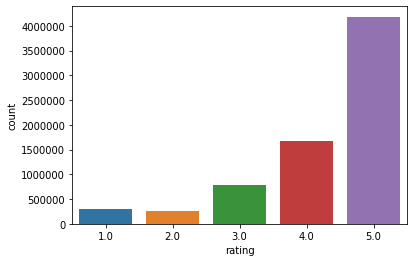

In [12]:
sns.countplot(data=raiting[raiting.rating > 0] , x = 'rating' )
plt.show()

# Filter some non-valueable rating

In [14]:
userRaitingCount = raiting['userId'].value_counts();
raitingFiltered = raiting[raiting['userId'].isin(userRaitingCount[userRaitingCount >= 40 ].index)]
print(raitingFiltered.shape)
print(raiting.shape)
productRaitingCount = raiting['productId'].value_counts();
raitingFiltered = raitingFiltered[raitingFiltered['userId'].isin(productRaitingCount[productRaitingCount >= 60 ].index)]
print(raitingFiltered.shape)

(2061909, 3)
(7202921, 3)
(75284, 3)


# Make the product-user martix and drop duplicates

In [15]:
raitingFiltered.drop_duplicates(subset=['userId', 'productId'], keep='first' , inplace =True )
raitingFilteredPivot = raitingFiltered.pivot( index='productId' , columns='userId' , values="rating" ).fillna(0)

In [22]:
display(raitingFilteredPivot)

userId,47.0,54.0,119.0,238.0,270.0,391.0,392.0,553.0,606.0,684.0,...,252345.0,259187.0,276110.0,285544.0,290730.0,299260.0,322224.0,328591.0,335953.0,353133.0
productId,,,,,,,,,,,,,,,,,,,,,
4,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Use sklearn NearestNeighbors methods to find the top-n similar items and recommend to users

In [24]:
#item based:
raitingFilteredMatrix = csr_matrix(raitingFilteredPivot.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(raitingFilteredMatrix)
NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine', metric_params=None, n_jobs=1, n_neighbors=10, p=2, radius=1.0)

queryIndex = raitingFilteredPivot.index.get_loc(489000)
distances, indices = model_knn.kneighbors(raitingFilteredPivot.iloc[queryIndex, :].values.reshape(1, -1), n_neighbors=11)

print('Recommendations for {0} ( {1} | {2} | {3} :\n'.format( products.iloc[raitingFilteredPivot.index[queryIndex]].product_name ,
                                                                     products.iloc[raitingFilteredPivot.index[queryIndex]].cat1_name,
                                                                     products.iloc[raitingFilteredPivot.index[queryIndex]].cat2_name,
                                                                     products.iloc[raitingFilteredPivot.index[queryIndex]].cat3_name))

for i in range(0, len(distances.flatten())):
        print('{0}: {1} ( {2} | {3} | {4} ) , with distance of {5}:'.format(i,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].product_name ,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].cat1_name,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].cat2_name,
                                                                           products.iloc[raitingFilteredPivot.index[indices.flatten()[i]]].cat3_name,
                                                                           distances.flatten()[i]))

Recommendations for Kingston 金士顿 Class10 8G TF卡(micro SD)手机存储卡 (二合一套装) ( 电脑/办公 | 存储设备 | 存储卡 :

0: Kingston 金士顿 Class10 8G TF卡(micro SD)手机存储卡 (二合一套装) ( 电脑/办公 | 存储设备 | 存储卡 ) , with distance of 0.0:
1: Kingston 金士顿 Class4 32G TF卡(micro SD)手机存储卡 (二合一套装) ( 电脑/办公 | 存储设备 | 存储卡 ) , with distance of 0.07588438434260847:
2: Kingston 金士顿 Class4 32G TF卡(micro SD)手机存储卡 ( 电脑/办公 | 存储设备 | 存储卡 ) , with distance of 0.11417541410013121:
3: Kingston 金士顿 Class4 16G TF卡(micro SD)手机存储卡 ( 电脑/办公 | 存储设备 | 存储卡 ) , with distance of 0.22351877241145202:
4: SanDisk 闪迪 microSDHC Class10 64GB 至尊极速移动存储卡 UHS-1制式 读取速度最高可达80MB/s 金红色 ( 电脑/办公 | 存储设备 | 存储卡 ) , with distance of 0.6530798250103607:
5: SanDisk 闪迪 microSDHC Class10 16GB至尊高速移动存储卡 UHS-1制式 读写速度最高可达30MB/s ( 电脑/办公 | 存储设备 | 存储卡 ) , with distance of 0.6534294658652479:
6: SanDisk 闪迪 microSDHC Class10 32GB 至尊极速移动存储卡 UHS-1制式 读取速度最高可达45MB/s(中英文随机发货) ( 电脑/办公 | 存储设备 | 存储卡 ) , with distance of 0.6546888188329361:
7: SanDisk 闪迪 microSDHC Class10 64GB 至尊极速移动存储卡 UHS-1制式 读取速度最高